In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 65 kB/s 


In [ ]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 30.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 994 kB 55.8 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 42.1 MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365096 sha256=39354169da1d5d9572bbf7c6178541875bba8cc6511c13298efdb140715a8cc2
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [ ]:
## Requirements :

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osgeo import gdal
import sys
import os
from glob import glob
# To show the image
import rasterio
from rasterio.plot import show
# plot hists
import earthpy.plot as ep
import earthpy as et
import earthpy.spatial as es

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/soilMoisture/Datasets/Dataset_3_Areas.csv')

In [ ]:
df.head()

,date_time,soil_moisture_depth_0.05,Image_name
0,2017-04-12,0.168,20170412T110621_20170412T111708_T30TUL.tif
1,2017-05-02,0.124,20170502T110621_20170502T110937_T30TUL.tif
2,2017-05-22,0.225,20170522T110621_20170522T110912_T30TUL.tif
3,2017-06-01,0.167,20170601T110651_20170601T111225_T30TUL.tif
4,2017-06-11,0.141,20170611T110621_20170611T111012_T30TUL.tif


In [ ]:
df.describe()

,soil_moisture_depth_0.05
count,505.000000
mean,0.154616
std,0.068416
min,0.047000
25%,0.101000
50%,0.146000
75%,0.198000
max,0.502000


In [ ]:
df['Image_name'].iloc[0]

'20190331T112119_20190331T112753_T29TQF.tif'

In [ ]:
path = '/content/drive/MyDrive/soilMoisture/Sentinel_images/20190402T110621_20190402T110826_T29TQF.tif'
data = tif_to_matrix(path)
print(data)

In [ ]:
## Read tif image as Array :

def tif_to_matrix(path):
  src_ds = gdal.Open(path)
  data = src_ds.ReadAsArray()
  return data 

In [ ]:
## Normalize bands into 0.0 - 1.0 scale :
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [ ]:
def indexes_formula(data):
  L = 0.5
  gndvi = es.normalized_diff(data[7], data[2])
  savi = savi = ((data[7] - data[3]) / (data[7] + data[3] + L)) * (1 + L)
  ndmi = es.normalized_diff(data[7], data[10])
  mndwi = es.normalized_diff(data[2], data[10])
  mndwi = normalize(mndwi)
  return gndvi, savi, ndmi, mndwi

In [ ]:
def savi_formula(data):
  L = 0.5
  savi = ((data[7] - data[3]) / (data[7] + data[3] + L)) * (1 + L)
  return savi

In [ ]:
def ndmi_formula(data):
  ndmi = es.normalized_diff(data[7], data[10])
  return ndmi 

In [ ]:
def mndwi_formula(data):
  mndwi = es.normalized_diff(data[2], data[10])
  return mndwi

In [ ]:
L['soil_moisture_depth_0.050000']

0.14800000000000002

# Indexes Data :

In [ ]:
S_bands_1 = glob("/content/drive/MyDrive/soilMoisture/Sentinel_images/*.tif")
S_bands_2 = glob("/content/drive/MyDrive/soilMoisture/Images_test/*.tif")

In [ ]:
S_bands_2[0]

'/content/drive/MyDrive/soilMoisture/Images_test/20200204T112149_20200204T112602_T29TQF.tif'

In [ ]:
directory1 = "/content/drive/MyDrive/soilMoisture/Sentinel_images"  
directory2 = "/content/drive/MyDrive/soilMoisture/Images_test"
Dict = {}
List_images = []
List_SMC = []
list_b = [0,1,4,5,9,10]
for i in range(1,len(df)) :
  List_Nbands = [] 
  list_indexes = []
  img = df['Image_name'].iloc[i]
  SMC = df['soil_moisture_depth_0.050000'].iloc[i]
  path1= directory1 + '/'+ img
  path2 = directory2 + '/'+ img
  if path1 in S_bands_1 :
    data = tif_to_matrix(path1)
  elif path2 in S_bands_2 :
    data = tif_to_matrix(path2)

  for e in list_b :
    band = normalize(data[e])
    List_Nbands.append(band)

  list_indexes = indexes_formula(data)
  for elt in list_indexes :
    List_Nbands.append(elt)

  List_SMC.append(SMC)
  List_images.append(List_Nbands)



Dict['image'] = List_images
Dict['soilreadings'] = List_SMC
   

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


In [ ]:
df_bands = pd.DataFrame(List_images,columns=['B1','B2','B5','B6','B9','B10','GNDVI','SAVI','NDMI','MNDWI'])

In [ ]:
df_bands['soil_moisture'] = List_SMC

In [ ]:
df_bands.head()

,B1,B2,B5,B6,B9,B10,GNDVI,SAVI,NDMI,MNDWI,soil_moisture
0,"[[0.0, 0.0, 0.0, 0.0, 0.14583333333333334, 0.1...","[[0.08926261319534282, 0.2069857697283312, 0.3...","[[0.25660377358490566, 0.25660377358490566, 0....","[[0.8571996817820207, 0.8571996817820207, 0.89...","[[0.9606625258799172, 0.9606625258799172, 0.96...","[[0.12334801762114538, 0.12334801762114538, 0....","[[0.6871051653660349, 0.6428436733924194, 0.58...","[[1.1226533166458073, 1.0212211825986302, 0.88...","[[0.24383561643835616, 0.224283305227656, 0.15...","[[0.7841171152322733, 0.7389019269591668, 0.53...",0.146
1,"[[0.046703296703296704, 0.046703296703296704, ...","[[0.13408393039918118, 0.24564994882292732, 0....","[[0.26881720430107525, 0.26881720430107525, 0....","[[0.9087852038671711, 0.9087852038671711, 0.98...","[[0.9441117764471058, 0.9441117764471058, 0.94...","[[0.140625, 0.140625, 0.28046875, 0.28046875, ...","[[0.7050656660412759, 0.6473616473616474, 0.58...","[[1.1422618470782053, 1.003166030356644, 0.836...","[[0.24169968574941933, 0.23501033769813923, 0....","[[0.7578455978107184, 0.6902904914320068, 0.49...",0.149
2,"[[0.175, 0.175, 0.175, 0.175, 0.21919642857142...","[[0.20474777448071216, 0.19584569732937684, 0....","[[0.23412421493370553, 0.23412421493370553, 0....","[[0.22610169491525423, 0.22610169491525423, 0....","[[0.0, 0.0, 0.0, 0.0, 0.06451612903225806, 0.0...","[[0.5145161290322581, 0.5145161290322581, 0.53...","[[3.001470047776553, 2.9861161856046765, 2.996...","[[0.012340773635619959, 0.01674068218279895, 0...","[[0.3741956036954444, 0.3776848507888234, 0.37...","[[0.3607964939623009, 0.3688528101101613, 0.33...",0.135
3,"[[0.4496021220159151, 0.4496021220159151, 0.44...","[[0.30634278002699056, 0.3090418353576248, 0.3...","[[0.4583059750492449, 0.4583059750492449, 0.54...","[[0.8658155289213132, 0.8658155289213132, 0.87...","[[0.9600189259522119, 0.9600189259522119, 0.96...","[[0.4620318642665011, 0.4620318642665011, 0.51...","[[0.6859903381642513, 0.671617497456765, 0.616...","[[1.1321881219231171, 1.108688750132289, 0.999...","[[0.30446970876810464, 0.29569468538085475, 0....","[[0.889100656394775, 0.8759874176794877, 0.698...",0.214
4,"[[0.0, 0.0, 0.0, 0.0, 0.016065830721003135, 0....","[[0.018172377985462097, 0.055036344755970926, ...","[[0.17214584578601316, 0.17214584578601316, 0....","[[0.6296400449943758, 0.6296400449943758, 0.65...","[[0.7124018838304552, 0.7124018838304552, 0.71...","[[0.07038123167155426, 0.07038123167155426, 0....","[[0.6942392909896603, 0.6370880115900036, 0.56...","[[1.1296207851752795, 0.9843363561417973, 0.82...","[[0.25957446808510637, 0.25259803242344464, 0....","[[0.8427502593058023, 0.7830672579300254, 0.62...",0.141


In [ ]:
df_bands.to_csv ('Dataset_bands&indexes.csv', header=True, index=False)

# PCA :

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid');

In [ ]:
df.iloc[10]

date_time                                                   2017-08-20
soil_moisture_depth_0.05                                         0.121
Image_name                  20170820T110651_20170820T111220_T30TUL.tif
Name: 10, dtype: object

In [ ]:
df['soil_moisture_depth_0.05'].iloc[10]

0.121

In [ ]:
path =  '/content/drive/MyDrive/Senti_Images-2017to2020_newArea/' + df['Image_name'].iloc[10]
X = tif_to_matrix(path)
X = normalize(X)
y = df['soil_moisture_depth_0.05'].iloc[10]
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (12, 140, 155)
y shape: ()


In [ ]:
# To show the image
import rasterio
from rasterio.plot import show

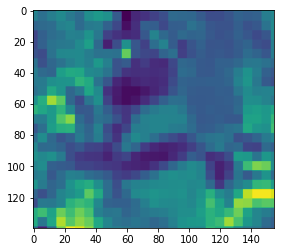

In [ ]:
show(X[0,:,])

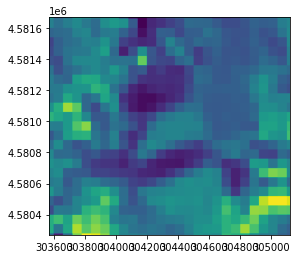

In [ ]:
src = rasterio.open(path)
show(src)

In [ ]:
def extract_pixels(X):
  q = X.reshape(-1, X.shape[0])
  df_pix = pd.DataFrame(data = q)
  df_pix.columns= [f'band{i}' for i in range(1, 1+X.shape[0])]
  df_pix.to_csv('Dataset.csv')
  return df_pix
  
df_pix = extract_pixels(X)


In [ ]:
q.shape

(21700, 1)

In [ ]:
df_pix

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12
0,0.151321,0.151321,0.151321,0.089135,0.089135,0.089135,0.089135,0.089135,0.089135,0.102263,0.102263,0.102263
1,0.102263,0.102263,0.102263,0.143894,0.143894,0.143894,0.143894,0.143894,0.143894,0.139402,0.139402,0.139402
2,0.139402,0.139402,0.139402,0.118501,0.118501,0.118501,0.118501,0.118501,0.118501,0.131802,0.131802,0.131802
3,0.131802,0.131802,0.131802,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.070824,0.070824,0.070824
4,0.070824,0.070824,0.070824,0.006564,0.006564,0.006564,0.006564,0.006564,0.006564,0.001382,0.001382,0.001382
...,...,...,...,...,...,...,...,...,...,...,...,...
21695,0.565383,0.565383,0.559682,0.559682,0.565555,0.565555,0.563137,0.563137,0.548799,0.548799,0.540853,0.540853
21696,0.536708,0.536708,0.543790,0.543790,0.570219,0.570219,0.598203,0.598203,0.613232,0.613232,0.602349,0.602349
21697,0.582830,0.582830,0.606150,0.606150,0.643289,0.643289,0.650371,0.650371,0.647435,0.647435,0.646744,0.646744
21698,0.634479,0.634479,0.630161,0.630161,0.637761,0.637761,0.645016,0.645016,0.656245,0.656245,0.657108,0.657108


In [ ]:
df_pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21700 entries, 0 to 21699
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band1   21700 non-null  uint16
 1   band2   21700 non-null  uint16
 2   band3   21700 non-null  uint16
 3   band4   21700 non-null  uint16
 4   band5   21700 non-null  uint16
 5   band6   21700 non-null  uint16
 6   band7   21700 non-null  uint16
 7   band8   21700 non-null  uint16
 8   band9   21700 non-null  uint16
 9   band10  21700 non-null  uint16
 10  band11  21700 non-null  uint16
 11  band12  21700 non-null  uint16
dtypes: uint16(12)
memory usage: 508.7 KB


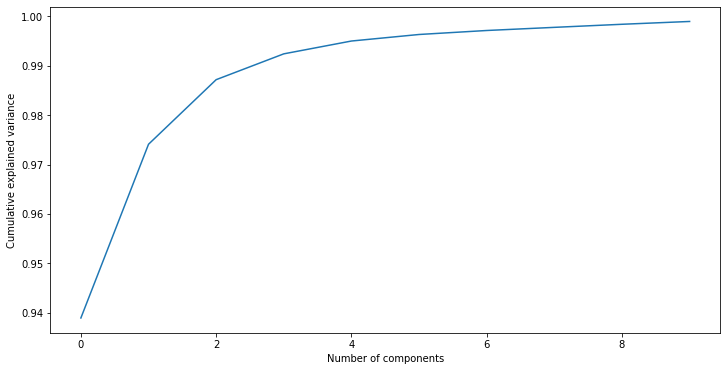

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

principalComponents = pca.fit_transform(df_pix.values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


In [ ]:
pca = PCA(n_components = 1)
dt = pca.fit_transform(df_pix.values)
q = pd.DataFrame(data = dt)
q.columns = [f'PC-{i}' for i in range(1,2)]

In [ ]:
q

,PC-1
0,-5608.546201
1,-5113.479870
2,-5223.869233
3,-5317.391722
4,-7344.788038
...,...
21695,3404.979632
21696,3809.642718
21697,4854.986419
21698,5132.485243


In [ ]:
datashow = q.loc[:, f'PC-{1}'].values.reshape(140, 155)

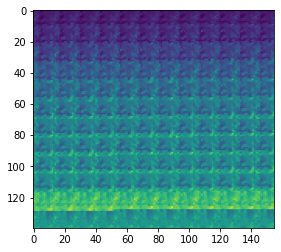

In [ ]:
show(datashow)

In [ ]:
q = dt.reshape(140, 155)

In [ ]:
q.shape

(140, 155)

In [ ]:
from sklearn.decomposition import PCA

def image_reduction (path):
  X = tif_to_matrix(path)
  df_pix = extract_pixels(X)
  pca = PCA(n_components = 1)
  dt = pca.fit_transform(df_pix.values)
  q_col = pd.DataFrame(data = dt)
  q_col.columns = ['PC-1']
  q_mat = dt.reshape(140, 155)
  return q_col, q_mat


In [ ]:
img_col, img_mat= image_reduction('/content/drive/MyDrive/Senti_Images-2017to2020_newArea/20170502T110621_20170502T110937_T30TUL.tif') 

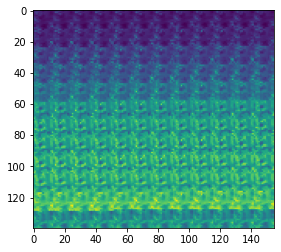

In [ ]:
show(img_mat)

# Clustering :

In [ ]:
# define dataset
X = df['soil_moisture_depth_0.05'].values
X = pd.DataFrame(X)

In [ ]:
metric = "euclidean"
linkage_method = "ward"

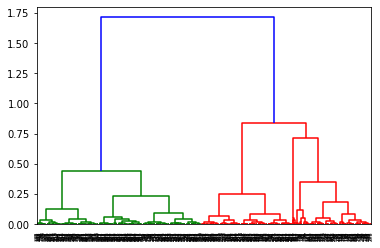

In [ ]:
# dendrogram to have an idea about aggregation procedure
# and the evolution between cluster distance

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, metric=metric, method=linkage_method)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

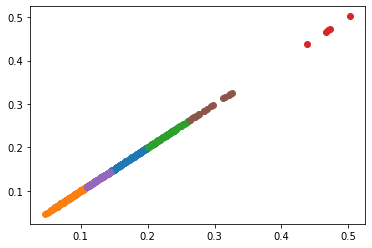

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X = df['soil_moisture_depth_0.05'].values
# define the model
model = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
X = X.reshape(-1, 1)
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix], X[row_ix, 0])
# show the plot
pyplot.show()

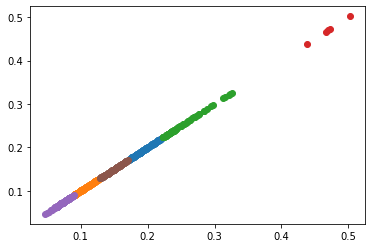

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import plotly.express as px

# define dataset
X = df['soil_moisture_depth_0.05'].values
# define the model
model = KMeans(n_clusters=6)
# fit the model
X = X.reshape(-1, 1)
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix])
  
# show the plot
pyplot.show()

In [ ]:
df['cluster'] = ""

In [ ]:
df['cluster'].iloc[3]

'cluster'

In [ ]:
c=1
all_clusters =[]
for cluster in clusters:
    row_ix = where(yhat == cluster)
    cluster_name = 'cluster_'+ str(c)
    c+=1
    cluster_list = X[row_ix].reshape(1,-1)[0]
    all_clusters.append((cluster_list,cluster_name))

In [ ]:
for i in range(len(df)):
  e = df['soil_moisture_depth_0.05'].iloc[i]
  for y in all_clusters :
    if e in y[0]:
      df['cluster'].iloc[i]=y[1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,date_time,soil_moisture_depth_0.05,Image_name,cluster
0,2017-04-12,0.168,20170412T110621_20170412T111708_T30TUL.tif,cluster_1
1,2017-05-02,0.124,20170502T110621_20170502T110937_T30TUL.tif,cluster_5
2,2017-05-22,0.225,20170522T110621_20170522T110912_T30TUL.tif,cluster_3
3,2017-06-01,0.167,20170601T110651_20170601T111225_T30TUL.tif,cluster_1
4,2017-06-11,0.141,20170611T110621_20170611T111012_T30TUL.tif,cluster_5


In [ ]:
import plotly.io as pio

subject = df['cluster'].values
score = df['soil_moisture_depth_0.05']

data = [dict(
  type = 'scatter',
  x = subject,
  y = score,
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = subject,
    styles = [
        dict(target = 'cluster_1', value = dict(marker = dict(color = 'blue'))),
        dict(target = 'cluster_2', value = dict(marker = dict(color = 'red'))),
        dict(target = 'cluster_3', value = dict(marker = dict(color = 'black'))),
        dict(target = 'cluster_4', value = dict(marker = dict(color = 'green'))),
        dict(target = 'cluster_5', value = dict(marker = dict(color = 'orange'))),
        dict(target = 'cluster_6', value = dict(marker = dict(color = 'purple')))
    ]
  )]
)]

fig_dict = dict(data=data)
pio.show(fig_dict, validate=False)

In [ ]:
df.to_csv('Dataset_clusters_3_Areas', index=False, header=True)